In [431]:
import warnings
warnings.filterwarnings("ignore")

In [432]:
import pandas as pd, numpy as np

In [433]:
ch_d=pd.read_csv("churn_data.csv")
ch_d.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [434]:
cus_d=pd.read_csv("customer_data.csv")
cus_d.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [435]:
int_d=pd.read_csv("internet_data.csv")
int_d.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [436]:
df1=pd.merge(ch_d,cus_d, how="inner", on="customerID")

In [437]:
df=pd.merge(df1,int_d, how="inner", on="customerID")

In [438]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [439]:
df.shape

(7043, 21)

In [440]:
df.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [442]:
Vlist=["PhoneService", "PaperlessBilling", "Churn", "Partner", "Dependents"]

def binary_map(x):
    return x.map({"Yes":1, "No":0})

df[Vlist]=df[Vlist].apply(binary_map)

In [443]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [444]:
df.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [445]:
dummy1=pd.get_dummies(df[['Contract', 'PaymentMethod', 'gender', 'InternetService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']])

In [446]:
df=pd.concat([df,dummy1],axis=1)

In [447]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,1,0,0,1,0,0,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,1,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,1,0,0,1,0,0,1,0,0


In [448]:
df=df.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies','MultipleLines_No phone service','OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service'],1)

In [449]:
df.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [450]:
df[df["TotalCharges"]==" "]

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
488,4472-LVYGI,0,0,1,52.55,,0,0,1,1,...,1,0,0,1,0,1,0,1,1,0
753,3115-CZMZD,0,1,0,20.25,,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
936,5709-LVOEQ,0,1,0,80.85,,0,0,1,1,...,0,1,0,1,1,0,0,1,0,1
1082,4367-NUYAO,0,1,0,25.75,,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1340,1371-DWPAZ,0,0,0,56.05,,0,0,1,1,...,0,1,0,1,0,1,0,1,1,0
3331,7644-OMVMY,0,1,0,19.85,,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3826,3213-VVOLG,0,1,0,25.35,,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4380,2520-SGTTA,0,1,0,20.00,,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5218,2923-ARZLG,0,1,1,19.70,,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6670,4075-WKNIU,0,1,0,73.35,,0,0,1,1,...,0,1,0,1,0,1,0,1,1,0


In [451]:
df["TotalCharges"].replace(" ", "0",inplace=True)

In [452]:
df[df["TotalCharges"]=="0"]

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
488,4472-LVYGI,0,0,1,52.55,0,0,0,1,1,...,1,0,0,1,0,1,0,1,1,0
753,3115-CZMZD,0,1,0,20.25,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
936,5709-LVOEQ,0,1,0,80.85,0,0,0,1,1,...,0,1,0,1,1,0,0,1,0,1
1082,4367-NUYAO,0,1,0,25.75,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1340,1371-DWPAZ,0,0,0,56.05,0,0,0,1,1,...,0,1,0,1,0,1,0,1,1,0
3331,7644-OMVMY,0,1,0,19.85,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3826,3213-VVOLG,0,1,0,25.35,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4380,2520-SGTTA,0,1,0,20.00,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5218,2923-ARZLG,0,1,1,19.70,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6670,4075-WKNIU,0,1,0,73.35,0,0,0,1,1,...,0,1,0,1,0,1,0,1,1,0


In [453]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [454]:
median=df["TotalCharges"].median()


In [455]:
df["TotalCharges"].replace("0", median,inplace=True)

In [456]:
df[df["TotalCharges"]==1394.55]

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
3162,6429-SHBCB,19,1,0,69.6,1394.55,0,0,0,0,...,1,0,1,0,1,0,0,1,0,1


In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   tenure                                   7043 non-null   int64  
 2   PhoneService                             7043 non-null   int64  
 3   PaperlessBilling                         7043 non-null   int64  
 4   MonthlyCharges                           7043 non-null   float64
 5   TotalCharges                             7043 non-null   float64
 6   Churn                                    7043 non-null   int64  
 7   SeniorCitizen                            7043 non-null   int64  
 8   Partner                                  7043 non-null   int64  
 9   Dependents                               7043 non-null   int64  
 10  Contract_Month-to-month                  7043 no

In [458]:
outliers=df[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [459]:
outliers.describe(percentiles=[.25,.5,.75,.9,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147,2279.734304
std,24.559481,30.090047,0.368612,2266.794470
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.500000,0.000000,398.550000
50%,29.000000,70.350000,0.000000,1394.550000
75%,55.000000,89.850000,0.000000,3786.600000
90%,69.000000,102.600000,1.000000,5973.690000
99%,72.000000,114.729000,1.000000,8039.256000
max,72.000000,118.750000,1.000000,8684.800000


In [460]:
from sklearn.model_selection import train_test_split

In [461]:
X=df.drop(df[["Churn","customerID"]], axis=1)
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_Month-to-month,Contract_One year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,0,1,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,0,1,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0


In [462]:
y=df.Churn
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [463]:
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=.7,test_size=.3,random_state=100)

In [464]:
from sklearn import preprocessing

In [465]:
X_train[['tenure','MonthlyCharges','TotalCharges']] = X_train[['tenure','MonthlyCharges','TotalCharges']]  / X_train[['tenure','MonthlyCharges','TotalCharges']].abs().max()
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_Month-to-month,Contract_One year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
877,0.708333,0,0,0.507167,0.354898,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,1
5792,0.208333,1,1,0.811973,0.164560,1,0,0,1,0,...,1,0,0,1,0,1,1,0,0,1
5334,0.680556,1,1,0.910202,0.610512,0,1,1,0,0,...,0,1,0,1,0,1,0,1,0,1
878,0.833333,1,0,0.545953,0.465912,0,0,0,0,1,...,1,0,0,1,0,1,1,0,1,0
6578,0.138889,1,0,0.620152,0.079964,0,0,1,0,1,...,1,0,0,1,0,1,1,0,0,1


In [466]:
churn = (sum(df['Churn'])/len(df['Churn'].index))*100
churn

26.536987079369588

In [467]:
import matplotlib.pyplot as plt, seaborn as sns

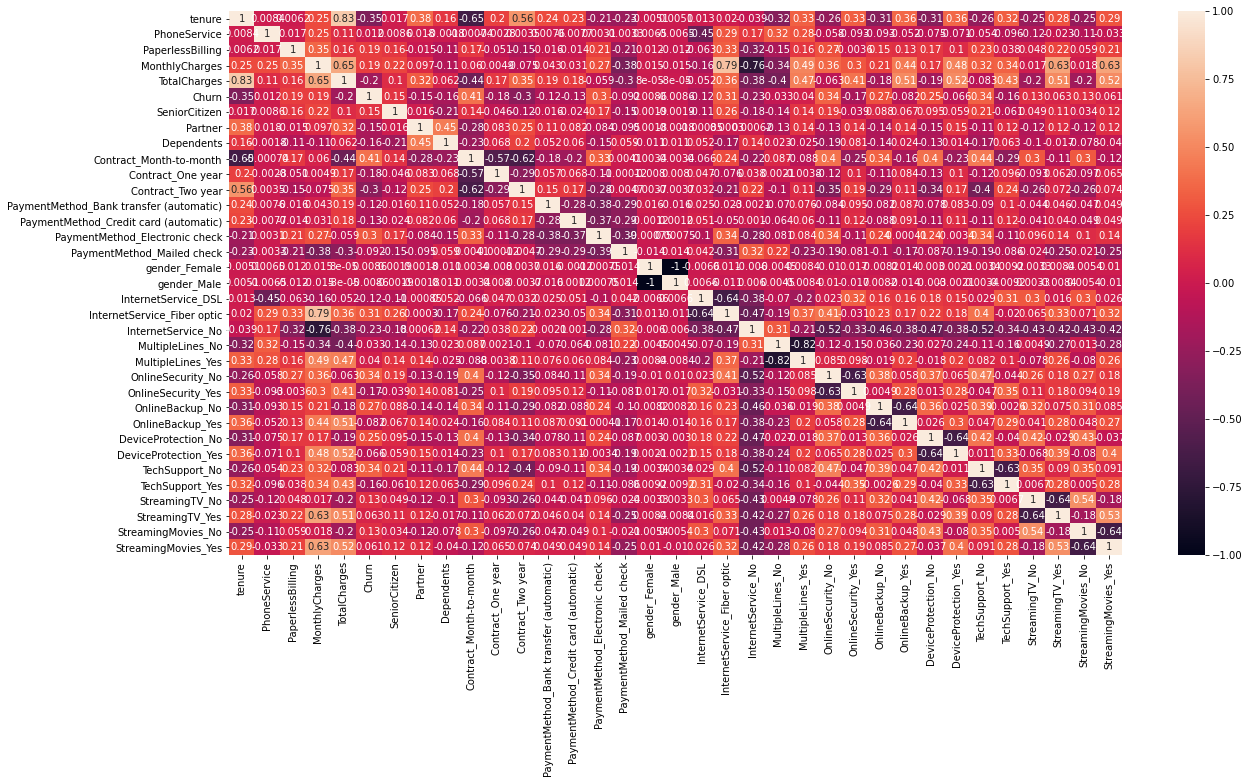

In [468]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [469]:
import statsmodels.api as sm

In [470]:
log1=sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
log1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.0
Date:                Mon, 06 Sep 2021   Deviance:                       4016.1
Time:                        15:19:07   Pearson chi2:                 5.77e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.1973      0.189     -1.046      0.296      -0.567       0.172
tenure                                     -3.9388      0.525     -7.500      0.000      -4.968      -2.909
PhoneService                                0.4578      0.587      0.780      0.435      -0.692       1.608
PaperlessBilling                            0.3453      0.090      3.828      0.000       0.169       0.522
MonthlyCharges                             -6.0245      4.566     -1.320      0.187     -14.973       2.924
TotalCharges                                2.3371      0.727      3.215      0.001       0.912       3.762
SeniorCitizen                               0.2950      0.103      2.877      0.004       0.094       0.496
Partner                                     0.0272      0.094      0.289      0.772      -0.157       0.212
Dependents                                 -0.2207      0.108     -2.049      0.040      -0.432      -0.010
Contract_Month-to-month                     0.6045      0.104      5.789      0.000       0.400       0.809
Contract_One year                          -0.0691      0.112     -0.617      0.537      -0.289       0.150
Contract_Two year                          -0.7327      0.151     -4.860      0.000      -1.028      -0.437
PaymentMethod_Bank transfer (automatic)    -0.0565      0.097     -0.585      0.559      -0.246       0.133
PaymentMethod_Credit card (automatic)      -0.2096      0.097     -2.160      0.031      -0.400      -0.019
PaymentMethod_Electronic check              0.2169      0.080      2.726      0.006       0.061       0.373
PaymentMethod_Mailed check                 -0.1481      0.092     -1.611      0.107      -0.328       0.032
gender_Female                              -0.0781      0.102     -0.766      0.444      -0.278       0.122
gender_Male                                -0.1192      0.102     -1.165      0.244      -0.320       0.081
InternetService_DSL                        -0.6089      0.223     -2.734      0.006      -1.045      -0.172
InternetService_Fiber optic                 1.4133      0.747      1.891      0.059      -0.051       2.878
InternetService_No                         -1.0017      0.367     -2.733      0.006      -1.720      -0.283
MultipleLines_No                           -0.0480      0.204     -0.236      0.813      -0.447       0.351
MultipleLines_Yes                           0.5058      0.392      1.290      0.197      -0.263       1.274
OnlineSecurity_No                           0.4236      0.176      2.401      0.016       0.078       0.769
OnlineSecurity_Yes                          0.3808      0.364      1.045      0.296      -0.334       1.095
OnlineBackup_No                             0.4125      0.1

In [471]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [472]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,15)
rfe=rfe.fit(X_train,y_train)

In [473]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False, False,  True,
       False,  True, False, False,  True, False, False, False,  True,
        True, False,  True, False,  True, False,  True, False, False,
       False,  True, False, False,  True, False, False])

In [474]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 9),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 15),
 ('Dependents', False, 3),
 ('Contract_Month-to-month', True, 1),
 ('Contract_One year', False, 16),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Bank transfer (automatic)', False, 13),
 ('PaymentMethod_Credit card (automatic)', False, 5),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 10),
 ('gender_Female', False, 12),
 ('gender_Male', False, 14),
 ('InternetService_DSL', True, 1),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', False, 2),
 ('MultipleLines_No', True, 1),
 ('MultipleLines_Yes', False, 11),
 ('OnlineSecurity_No', True, 1),
 ('OnlineSecurity_Yes', False, 17),
 ('OnlineBackup_No', True, 1),
 ('OnlineBackup_Yes', False, 19),
 ('DeviceProtection_No', False, 7),
 ('DeviceProtection_Yes', False, 8),
 ('TechSupport_No', Tru

In [475]:
col = X_train.columns[rfe.support_]

In [476]:
X_train.columns[~rfe.support_]

Index(['MonthlyCharges', 'Partner', 'Dependents', 'Contract_One year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'gender_Female', 'gender_Male', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

In [477]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4914
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2013.5
Date:                Mon, 06 Sep 2021   Deviance:                       4027.0
Time:                        15:19:09   Pearson chi2:                 5.86e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.5524      0.245     -6.339      0.000      -2.032      -1.072
tenure                            -4.0339      0.509     -7.919      0.000      -5.032      -3.036
PhoneService                      -0.3309      0.171     -1.939      0.052      -0.665       0.004
PaperlessBilling                   0.3610      0.090      4.020      0.000       0.185       0.537
TotalCharges                       2.5123      0.697      3.604      0.000       1.146       3.879
SeniorCitizen                      0.3323      0.100      3.307      0.001       0.135       0.529
Contract_Month-to-month            0.6847      0.128      5.335      0.000       0.433       0.936
Contract_Two year                 -0.6695      0.208     -3.223      0.001      -1.077      -0.262
PaymentMethod_Electronic check     0.3638      0.083      4.365      0.000       0.200       0.527
InternetService_DSL               -0.1593      0.200     -0.797      0.425      -0.551       0.232
InternetService_Fiber optic        0.6117      0.221      2.772      0.006       0.179       1.044
MultipleLines_No                  -0.3001      0.096     -3.130      0.002      -0.488      -0.112
OnlineSecurity_No                  0.3070      0.102      3.018      0.003       0.108       0.506
OnlineBackup_No                    0.2801      0.093      3.015      0.003       0.098       0.462
TechSupport_No                     0.5067      0.104      4.877      0.000       0.303       0.710
StreamingTV_Yes                    0.2265      0.095      2.386      0.017       0.040       0.412
==================================================================================================
"""

In [478]:
y_train_pred=res.predict(X_train_sm).values.reshape(-1)

In [479]:
y_train_pred

array([0.04027374, 0.41566503, 0.09464658, ..., 0.00443962, 0.68633015,
       0.63127234])

In [480]:
y_train_pred_final=pd.DataFrame({"Churn":y_train.values, "Churn_Prob":y_train_pred})
y_train_pred_final["CustID"]=y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.040274,877
1,1,0.415665,5792
2,1,0.094647,5334
3,0,0.026862,878
4,0,0.106983,6578


In [481]:
y_train_pred_final["Pred"]=y_train_pred_final.Churn_Prob.map(lambda x: 1 if x>=0.5 else 0)

In [482]:
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,Pred
0,0,0.040274,877,0
1,1,0.415665,5792,0
2,1,0.094647,5334,0
3,0,0.026862,878,0
4,0,0.106983,6578,0


In [483]:
from sklearn import metrics

In [484]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Pred)
print(confusion)

[[3255  372]
 [ 550  753]]


In [485]:
# Predicted     not_churn    churn
# Actual
# not_churn        3255        372
# churn            550         753 

In [486]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Pred))

0.8129817444219067


In [487]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [488]:
vif=pd.DataFrame()
vif["Featuers"]=X_train[col].columns
vif["VIF"]=[variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF", ascending=False)

In [489]:
vif

,Featuers,VIF
3,TotalCharges,16.02
9,InternetService_Fiber optic,13.07
0,tenure,12.76
1,PhoneService,9.37
8,InternetService_DSL,5.54
5,Contract_Month-to-month,4.43
13,TechSupport_No,3.64
11,OnlineSecurity_No,3.56
2,PaperlessBilling,2.95
10,MultipleLines_No,2.85


In [490]:
col=col.drop("TotalCharges",1)

In [491]:
X_train_sm=sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4915
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2020.3
Date:                Mon, 06 Sep 2021   Deviance:                       4040.6
Time:                        15:19:10   Pearson chi2:                 5.17e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.8531      0.230     -8.061      0.000      -2.304      -1.403
tenure                            -2.3746      0.194    -12.245      0.000      -2.755      -1.995
PhoneService                      -0.1619      0.161     -1.007      0.314      -0.477       0.153
PaperlessBilling                   0.3548      0.090      3.962      0.000       0.179       0.530
SeniorCitizen                      0.3383      0.101      3.353      0.001       0.141       0.536
Contract_Month-to-month            0.6732      0.127      5.287      0.000       0.424       0.923
Contract_Two year                 -0.6447      0.206     -3.128      0.002      -1.049      -0.241
PaymentMethod_Electronic check     0.3569      0.084      4.273      0.000       0.193       0.521
InternetService_DSL                0.0235      0.191      0.123      0.902      -0.352       0.399
InternetService_Fiber optic        0.9524      0.199      4.776      0.000       0.562       1.343
MultipleLines_No                  -0.3515      0.095     -3.719      0.000      -0.537      -0.166
OnlineSecurity_No                  0.2650      0.101      2.619      0.009       0.067       0.463
OnlineBackup_No                    0.2250      0.092      2.455      0.014       0.045       0.405
TechSupport_No                     0.4547      0.103      4.414      0.000       0.253       0.657
StreamingTV_Yes                    0.3320      0.090      3.677      0.000       0.155       0.509
==================================================================================================
"""

In [492]:
y_train_pred=res.predict(X_train_sm).values.reshape(-1)

In [493]:
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['Pred'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,Pred
0,0,0.049521,877,0
1,1,0.421277,5792,0
2,1,0.085366,5334,0
3,0,0.032660,878,0
4,0,0.109462,6578,0


In [494]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Pred))

0.8085192697768763


In [495]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,PhoneService,9.37
8,InternetService_Fiber optic,8.06
0,tenure,5.64
7,InternetService_DSL,4.40
4,Contract_Month-to-month,4.23
12,TechSupport_No,3.46
10,OnlineSecurity_No,3.40
2,PaperlessBilling,2.95
9,MultipleLines_No,2.70
11,OnlineBackup_No,2.61


In [496]:
col=col.drop("PhoneService",1)

In [497]:
X_train_sm=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4916
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2020.8
Date:                Mon, 06 Sep 2021   Deviance:                       4041.6
Time:                        15:19:10   Pearson chi2:                 5.16e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.9823      0.191    -10.378      0.000      -2.357      -1.608
tenure                            -2.3883      0.194    -12.325      0.000      -2.768      -2.009
PaperlessBilling                   0.3528      0.089      3.943      0.000       0.177       0.528
SeniorCitizen                      0.3411      0.101      3.381      0.001       0.143       0.539
Contract_Month-to-month            0.6748      0.127      5.298      0.000       0.425       0.924
Contract_Two year                 -0.6446      0.206     -3.128      0.002      -1.049      -0.241
PaymentMethod_Electronic check     0.3588      0.083      4.299      0.000       0.195       0.522
InternetService_DSL                0.0583      0.188      0.310      0.756      -0.310       0.427
InternetService_Fiber optic        0.9307      0.198      4.693      0.000       0.542       1.319
MultipleLines_No                  -0.3879      0.087     -4.445      0.000      -0.559      -0.217
OnlineSecurity_No                  0.2698      0.101      2.670      0.008       0.072       0.468
OnlineBackup_No                    0.2247      0.092      2.451      0.014       0.045       0.404
TechSupport_No                     0.4583      0.103      4.452      0.000       0.256       0.660
StreamingTV_Yes                    0.3341      0.090      3.700      0.000       0.157       0.511
==================================================================================================
"""

In [498]:
y_train_pred=res.predict(X_train_sm).values.reshape(-1)

In [499]:
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['Pred'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,Pred
0,0,0.044917,877,0
1,1,0.414927,5792,0
2,1,0.085892,5334,0
3,0,0.034530,878,0
4,0,0.115986,6578,0


In [500]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Pred))

0.8101419878296146


In [501]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,InternetService_Fiber optic,7.74
0,tenure,4.50
6,InternetService_DSL,4.40
3,Contract_Month-to-month,3.67
11,TechSupport_No,3.46
9,OnlineSecurity_No,3.40
1,PaperlessBilling,2.92
10,OnlineBackup_No,2.61
12,StreamingTV_Yes,2.30
4,Contract_Two year,2.26


In [502]:
col=col.drop("InternetService_Fiber optic",1)

In [503]:
X_train_sm=sm.add_constant(X_train[col])
logm5=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4917
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2032.0
Date:                Mon, 06 Sep 2021   Deviance:                       4064.0
Time:                        15:19:10   Pearson chi2:                 5.30e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.7240      0.177     -9.753      0.000      -2.071      -1.378
tenure                            -2.1492      0.186    -11.555      0.000      -2.514      -1.785
PaperlessBilling                   0.4070      0.089      4.599      0.000       0.234       0.581
SeniorCitizen                      0.3553      0.101      3.512      0.000       0.157       0.554
Contract_Month-to-month            0.7061      0.127      5.567      0.000       0.457       0.955
Contract_Two year                 -0.6654      0.206     -3.231      0.001      -1.069      -0.262
PaymentMethod_Electronic check     0.4019      0.083      4.845      0.000       0.239       0.565
InternetService_DSL               -0.7187      0.089     -8.107      0.000      -0.892      -0.545
MultipleLines_No                  -0.4236      0.087     -4.856      0.000      -0.595      -0.253
OnlineSecurity_No                  0.4503      0.095      4.719      0.000       0.263       0.637
OnlineBackup_No                    0.3708      0.087      4.253      0.000       0.200       0.542
TechSupport_No                     0.6524      0.097      6.758      0.000       0.463       0.842
StreamingTV_Yes                    0.4254      0.089      4.778      0.000       0.251       0.600
==================================================================================================
"""

In [504]:
y_train_pred=res.predict(X_train_sm).values.reshape(-1)

In [505]:
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['Pred'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,Pred
0,0,0.040355,877,0
1,1,0.319493,5792,0
2,1,0.071137,5334,0
3,0,0.030443,878,0
4,0,0.085461,6578,0


In [506]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Pred))

0.811156186612576


In [507]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif 

,Features,VIF
0,tenure,3.64
1,PaperlessBilling,2.83
2,SeniorCitizen,1.33
3,Contract_Month-to-month,3.53
4,Contract_Two year,2.26
5,PaymentMethod_Electronic check,1.93
6,InternetService_DSL,1.57
7,MultipleLines_No,1.70
8,OnlineSecurity_No,3.04
9,OnlineBackup_No,2.35


In [508]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [509]:
TP / float(TP+FN)

0.577897160399079

In [510]:
TN / float(TN+FP)

0.8974358974358975

In [511]:
print(FP/ float(TN+FP))

0.10256410256410256


In [512]:
print (TP / float(TP+FP))

0.6693333333333333


In [513]:
print (TN / float(TN+ FN))

0.8554533508541393


In [514]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [515]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

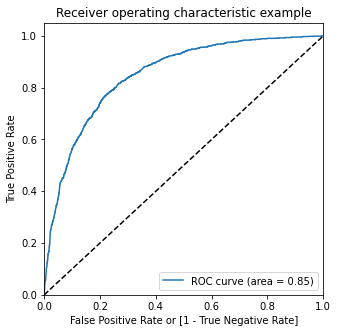

In [516]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [517]:
number=[float(i/10) for i in range(10)]
for i in number:
    y_train_pred_final[i]=y_train_pred_final.Churn_Prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,Pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.040355,877,0,1,0,0,0,0,0,0,0,0,0
1,1,0.319493,5792,0,1,1,1,1,0,0,0,0,0,0
2,1,0.071137,5334,0,1,0,0,0,0,0,0,0,0,0
3,0,0.030443,878,0,1,0,0,0,0,0,0,0,0,0
4,0,0.085461,6578,0,1,0,0,0,0,0,0,0,0,0


In [518]:
cut_off=pd.DataFrame(columns=["prob","accuracy","speci","sensi"])
from sklearn.metrics import confusion_matrix
num=[float(i/10) for i in range(10)]
for i in num:
    cm1=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy=(cm1[0,0]+cm1[1,1])/total1
    speci=cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi=cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cut_off.loc[i]=[i,accuracy,speci,sensi]
print(cut_off)

     prob  accuracy     speci     sensi
0.0   0.0  0.264300  0.000000  1.000000
0.1   0.1  0.613793  0.497105  0.938603
0.2   0.2  0.719473  0.670251  0.856485
0.3   0.3  0.776876  0.779432  0.769762
0.4   0.4  0.799189  0.844775  0.672295
0.5   0.5  0.811156  0.902399  0.557176
0.6   0.6  0.802840  0.945685  0.405219
0.7   0.7  0.774037  0.979597  0.201842
0.8   0.8  0.747262  0.994762  0.058327
0.9   0.9  0.735700  1.000000  0.000000


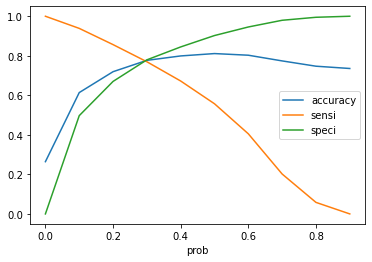

In [519]:
cut_off.plot.line(x="prob", y=["accuracy","sensi","speci"])
plt.show()

In [520]:
y_train_pred_final["final_predicted"]=y_train_pred_final.Churn_Prob.map(lambda x: 1 if x>0.29 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,Pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.040355,877,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.319493,5792,0,1,1,1,1,0,0,0,0,0,0,1
2,1,0.071137,5334,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.030443,878,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.085461,6578,0,1,0,0,0,0,0,0,0,0,0,0


In [521]:

metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.final_predicted)

0.7732251521298175

In [522]:
confusion2=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.final_predicted)
confusion2

array([[2798,  829],
       [ 289, 1014]], dtype=int64)

In [523]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [524]:
TP / float(TP+FN)

0.7782041442824251

In [525]:
TN/float(TN+FP)

0.7714364488558036

In [526]:
TP / float(TP+FN)

0.7782041442824251

In [527]:
print (TP / float(TP+FP))

0.5501899077590885


In [528]:
print (TN / float(TN+ FN))

0.9063816002591513


In [529]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Pred )
confusion

array([[3273,  354],
       [ 577,  726]], dtype=int64)

In [530]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6722222222222223

In [531]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5571757482732157

In [532]:
from sklearn.metrics import precision_score, recall_score

In [533]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.Pred)

0.6722222222222223

In [534]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.Pred)

0.5571757482732157

In [535]:
from sklearn.metrics import precision_recall_curve

In [536]:
y_train_pred_final.Churn, y_train_pred_final.Pred

(0       0
 1       1
 2       1
 3       0
 4       0
        ..
 4925    0
 4926    1
 4927    0
 4928    1
 4929    1
 Name: Churn, Length: 4930, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 4925    0
 4926    0
 4927    0
 4928    1
 4929    1
 Name: Pred, Length: 4930, dtype: int64)

In [537]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

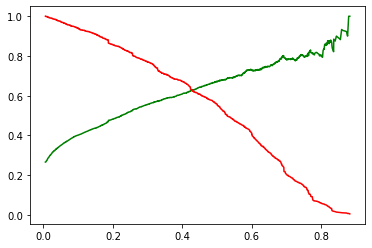

In [538]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [539]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = X_test[['tenure','MonthlyCharges','TotalCharges']]  / X_test[['tenure','MonthlyCharges','TotalCharges']].abs().max()
X_test.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_Month-to-month,Contract_One year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
4880,0.694444,1,0,0.173053,0.122933,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1541,1.000000,1,0,0.167158,0.165128,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1289,0.875000,1,0,0.579368,0.473396,0,0,0,0,1,...,0,1,0,1,0,1,1,0,1,0
5745,0.847222,1,1,0.203789,0.166406,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4873,0.097222,1,0,0.162526,0.016690,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [540]:
X_test = X_test[col]
X_test.head()

,tenure,PaperlessBilling,SeniorCitizen,Contract_Month-to-month,Contract_Two year,PaymentMethod_Electronic check,InternetService_DSL,MultipleLines_No,OnlineSecurity_No,OnlineBackup_No,TechSupport_No,StreamingTV_Yes
4880,0.694444,0,0,0,1,0,0,1,0,0,0,0
1541,1.000000,0,0,0,1,0,0,1,0,0,0,0
1289,0.875000,0,0,0,0,0,1,0,0,0,0,0
5745,0.847222,1,0,0,1,0,0,0,0,0,0,0
4873,0.097222,0,0,1,0,0,0,1,0,0,0,0


In [541]:
X_test_sm = sm.add_constant(X_test)

In [542]:
y_test_pred = res.predict(X_test_sm)

In [543]:
y_test_pred

4880    0.013314
1541    0.006949
1289    0.013083
5745    0.021812
4873    0.161047
          ...   
1285    0.804189
5092    0.161047
5837    0.533370
3597    0.369544
3625    0.007158
Length: 2113, dtype: float64

In [544]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4880,0.013314
1541,0.006949
1289,0.013083
5745,0.021812
4873,0.161047


In [545]:
y_test_df = pd.DataFrame(y_test)

In [546]:
y_test_df['CustID'] = y_test_df.index

In [547]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [548]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [549]:
y_pred_final.head()

,Churn,CustID,0
0,0,4880,0.013314
1,0,1541,0.006949
2,0,1289,0.013083
3,0,5745,0.021812
4,0,4873,0.161047


In [550]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [552]:
y_pred_final.head()

,Churn,CustID,Churn_Prob
0,0,4880,0.013314
1,0,1541,0.006949
2,0,1289,0.013083
3,0,5745,0.021812
4,0,4873,0.161047


In [553]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [554]:
y_pred_final.head()

,Churn,CustID,Churn_Prob,final_predicted
0,0,4880,0.013314,0
1,0,1541,0.006949,0
2,0,1289,0.013083,0
3,0,5745,0.021812,0
4,0,4873,0.161047,0


In [555]:
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7468054898248935

In [556]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1154,  393],
       [ 142,  424]], dtype=int64)

In [557]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [558]:
TP / float(TP+FN)

0.7491166077738516

In [559]:
TN / float(TN+FP)

0.7459599224305107